In [1]:
install.packages("igraph")


  There is a binary version available but the source version is later:
       binary source needs_compilation
igraph  1.2.6  1.4.2              TRUE

  Binaries will be installed
package 'igraph' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'igraph'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\yaman\anaconda3\Lib\R\library\00LOCK\igraph\libs\x64\igraph.dll to C:\Users\yaman\anaconda3\Lib\R\library\igraph\libs\x64\igraph.dll: Permission denied"Warning message:
"restored 'igraph'"


The downloaded binary packages are in
	C:\Users\yaman\AppData\Local\Temp\RtmpiW4es3\downloaded_packages


In [2]:
library('igraph')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



[1] "Partial Attachment Model produced a connected graph"


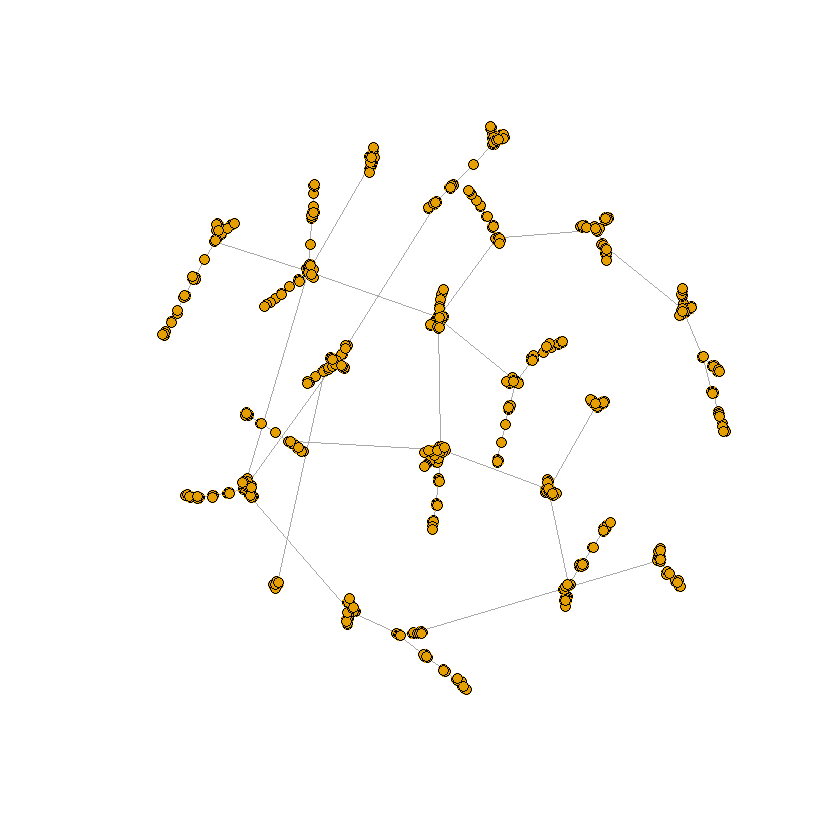

In [3]:
#Part 1.2a
pa_part_a = sample_pa(n = 1050,m = 1,directed = FALSE)
if(is_connected(pa_part_a)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_a,vertex.size=4, vertex.label=NA)

[1] "Modularity of PA graph:  0.934576122704358"


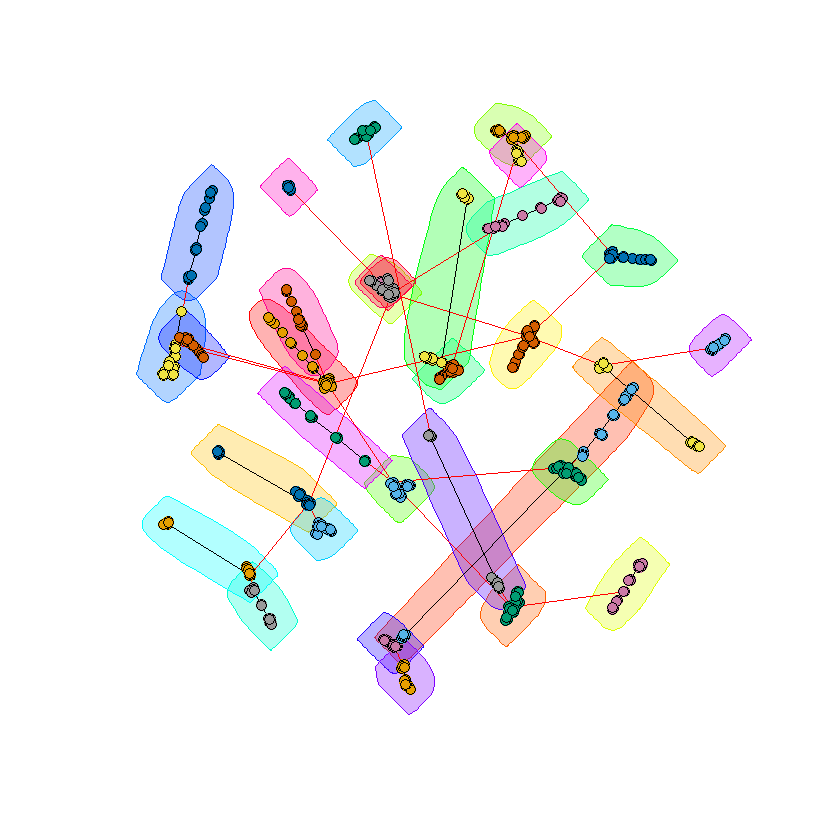

In [4]:
#Part 1.2b
pa_community = cluster_fast_greedy(pa_part_a)
pa_modularity = modularity(pa_community)
plot(pa_community,pa_part_a, vertex.size = 4,vertex.label = NA)
print(paste("Modularity of PA graph: ", pa_modularity))

In [5]:
#Part 1.c

pa_part_c = sample_pa(n = 10050,m = 1,directed = FALSE)
if(is_connected(pa_part_c)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}

[1] "Partial Attachment Model produced a connected graph"


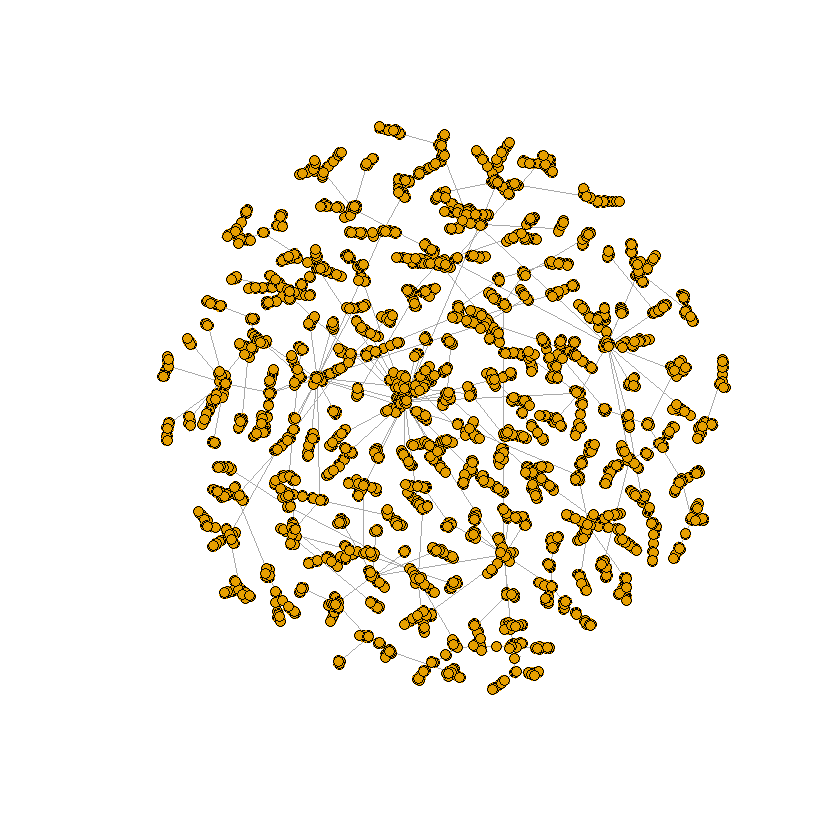

[1] "Modularity of PA graph:  0.978295277411775"


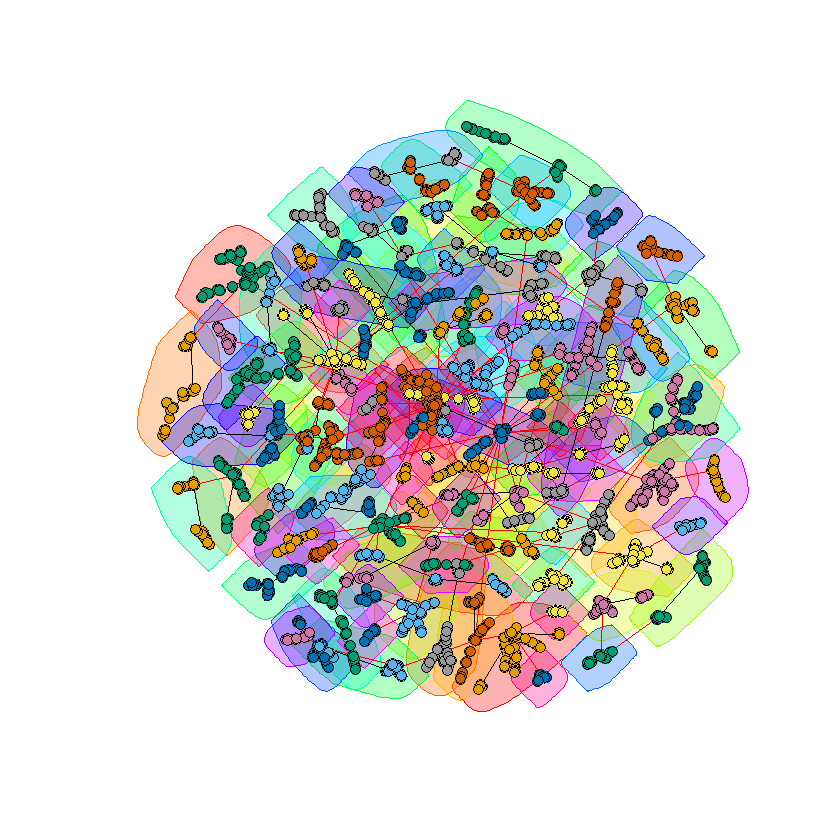

In [6]:
plot(pa_part_c,vertex.size=4, vertex.label=NA)
pa_community_c = cluster_fast_greedy(pa_part_c)
pa_modularity_c = modularity(pa_community_c)
plot(pa_community_c,pa_part_c, vertex.size = 4,vertex.label = NA)
print(paste("Modularity of PA graph: ", pa_modularity_c))

[1] "Slope and intercept for n = 1050:"

Call:
lm(formula = log_dist_1 ~ log_deg_1)

Coefficients:
(Intercept)    log_deg_1  
     0.9379      -2.6454  



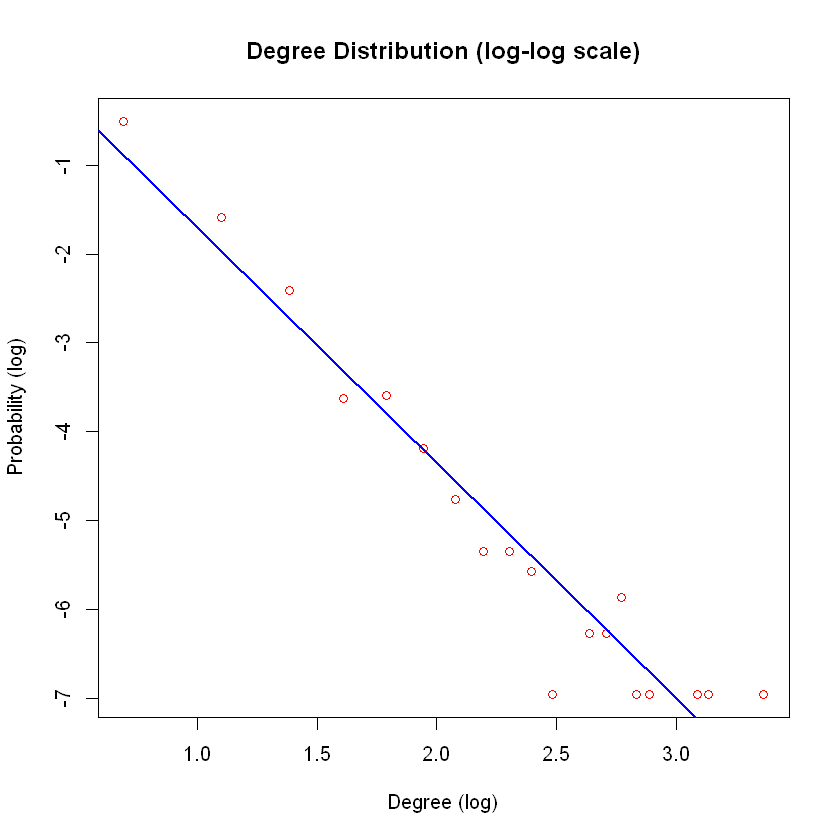

In [7]:
degree_dist_1 = degree.distribution(pa_part_a)
log_deg_1 <- log(which(degree_dist_1 !=0, arr.ind = TRUE))
log_dist_1 <- log(degree_dist_1[which(degree_dist_1 !=0)])
plot(log_deg_1,log_dist_1,main="Degree Distribution (log-log scale)", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_1 = lm(log_dist_1 ~ log_deg_1)
abline(fit_1,col="blue",lwd=2)  
print("Slope and intercept for n = 1050:")
print(fit_1)

[1] "Fitting data for n = 10050:"

Call:
lm(formula = log_dist_2 ~ log_deg_2)

Coefficients:
(Intercept)    log_deg_2  
     0.8896      -2.7757  



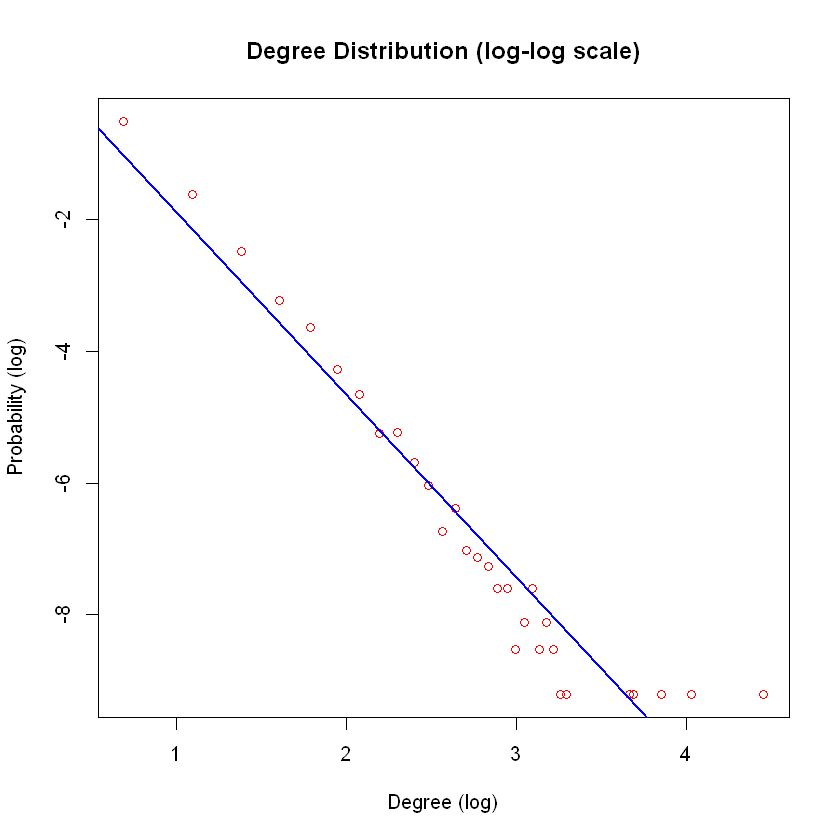

In [8]:
degree_dist_2 = degree.distribution(pa_part_c)
log_deg_2 <- log(which(degree_dist_2 !=0))
log_dist_2 <- log(degree_dist_2[which(degree_dist_2 !=0)])
plot(log_deg_2,log_dist_2,main="Degree Distribution (log-log scale)", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_2 = lm(log_dist_2 ~ log_deg_2)
abline(fit_2,col="blue",lwd=2)
print("Fitting data for n = 10050:")
print(fit_2)

In [9]:
degree_neighbors_a = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_a), 1) 
    neighbors_i = neighbors(pa_part_a, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_a = c(degree_neighbors_a, degree(pa_part_a, node_j))
}

In [10]:
degree_neighbors_c = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_c), 1) 
    neighbors_i = neighbors(pa_part_c, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_c = c(degree_neighbors_c, degree(pa_part_c, node_j))
}

[1] "Fitting data for n = 1050:"

Call:
lm(formula = log_dist_neighbors_a ~ log_degree_neighbors_a)

Coefficients:
           (Intercept)  log_degree_neighbors_a  
                -1.129                  -1.175  



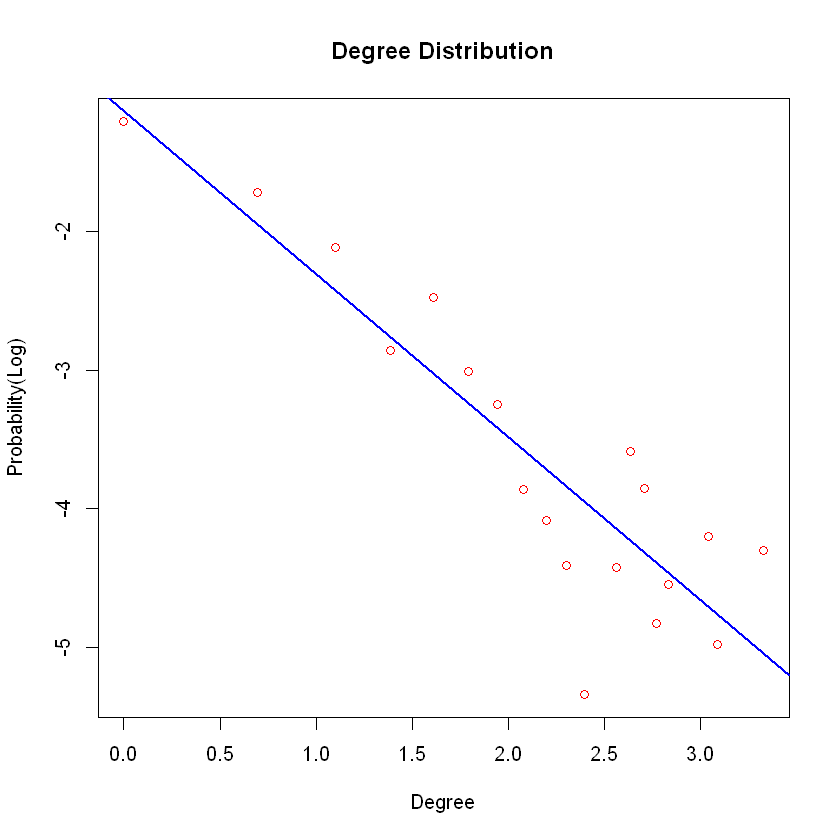

In [11]:
data_degree_neighbors_a = as.data.frame(table(degree_neighbors_a))
degrees = as.numeric(as.character(data_degree_neighbors_a$degree_neighbors_a))
log_degree_neighbors_a = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_a$Freq/sum(data_degree_neighbors_a$Freq)
log_dist_neighbors_a = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_a,log_dist_neighbors_a,main="Degree Distribution", xlab= "Degree",ylab= "Probability(Log)",col="red")
fit_3 = lm(log_dist_neighbors_a ~ log_degree_neighbors_a)
abline(fit_3,col="blue",lwd=2)
print("Fitting data for n = 1050:")
print(fit_3)

[1] "Fitting data for n = 10050:"

Call:
lm(formula = log_dist_neighbors_c ~ log_degree_neighbors_c)

Coefficients:
           (Intercept)  log_degree_neighbors_c  
                 -1.10                   -1.32  



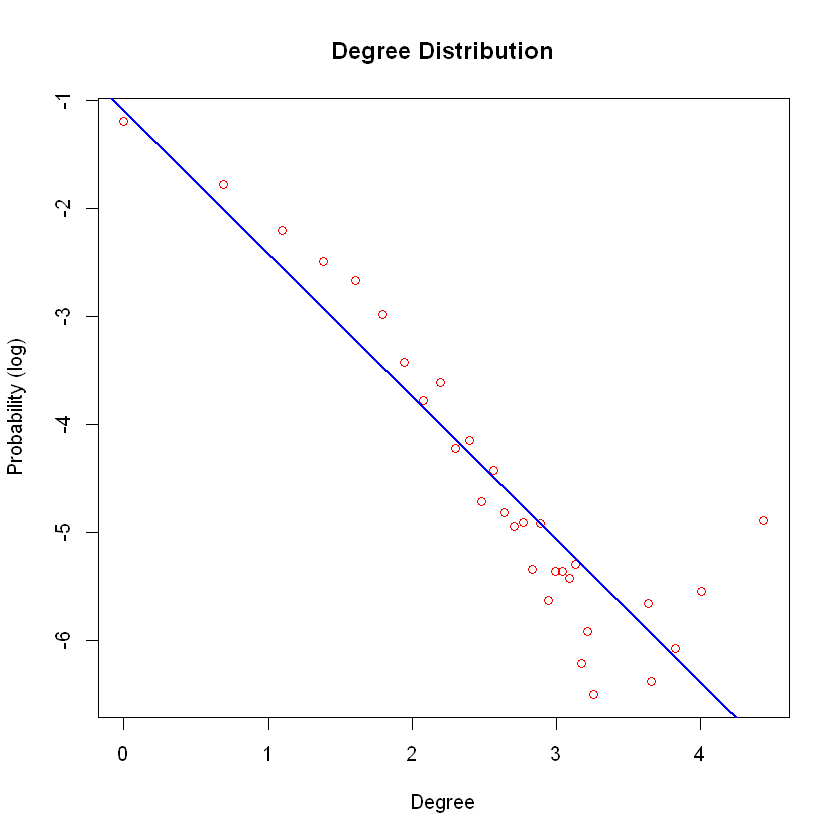

In [12]:
data_degree_neighbors_c = as.data.frame(table(degree_neighbors_c))
degrees = as.numeric(as.character(data_degree_neighbors_c$degree_neighbors_c))
log_degree_neighbors_c = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_c$Freq/sum(data_degree_neighbors_c$Freq)
log_dist_neighbors_c = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_c,log_dist_neighbors_c,main="Degree Distribution", xlab="Degree",ylab="Probability (log)",col="red")
fit_4 = lm(log_dist_neighbors_c ~ log_degree_neighbors_c)
abline(fit_4,col="blue",lwd=2)
print("Fitting data for n = 10050:")
print(fit_4)

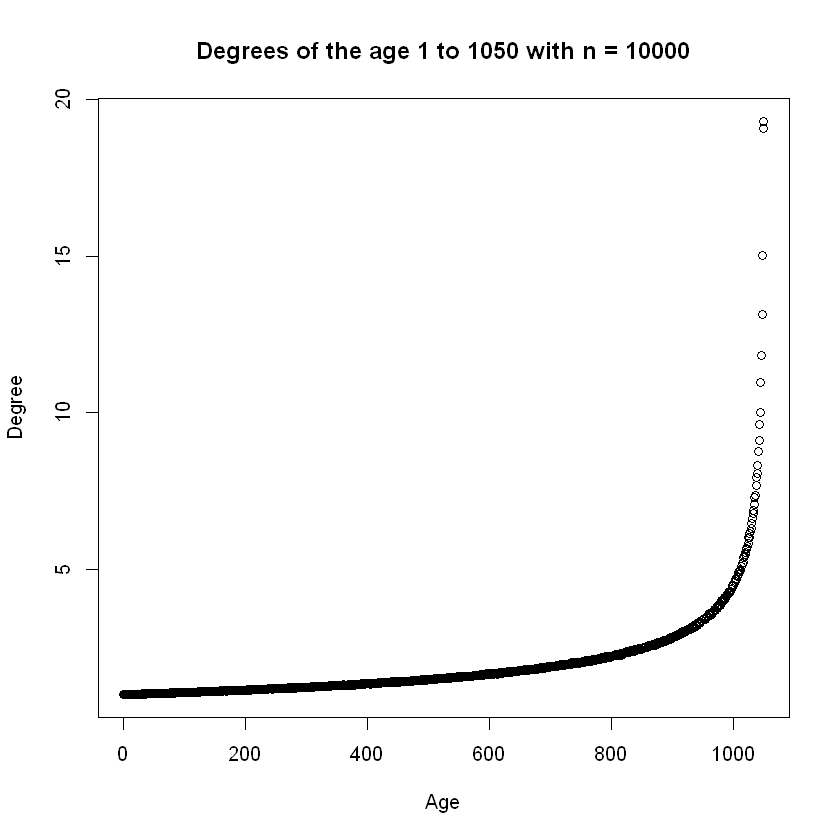

In [13]:
degree_age = rep(0,1050)
n_samples = 10000
for (i in seq(1:n_samples)) 
{
    graph_age = sample_pa(1050, m =1, directed=FALSE)
    degree_age = degree_age + as.vector(degree(graph_age))
}

degree_age = degree_age / n_samples
plot(seq(1050,1,-1), degree_age, main="Degrees of the age 1 to 1050 with n = 10000",xlab="Age",ylab="Degree")
     


In [14]:
#Part g

[1] "Partial Attachment Model produced a connected graph"


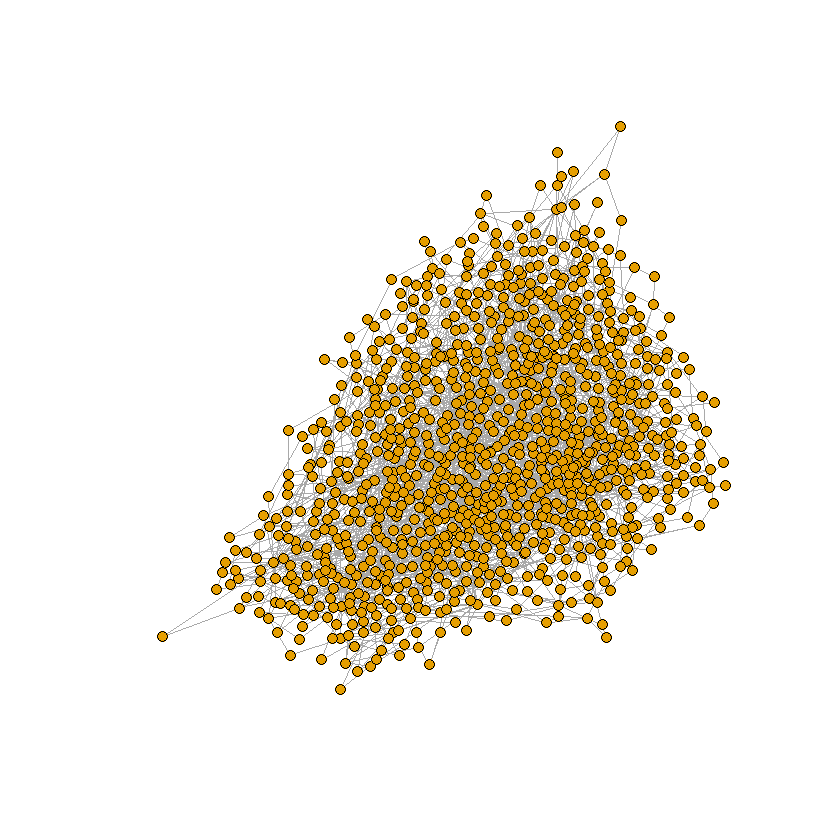

[1] "Modularity of PA graph:  0.524155587983745"


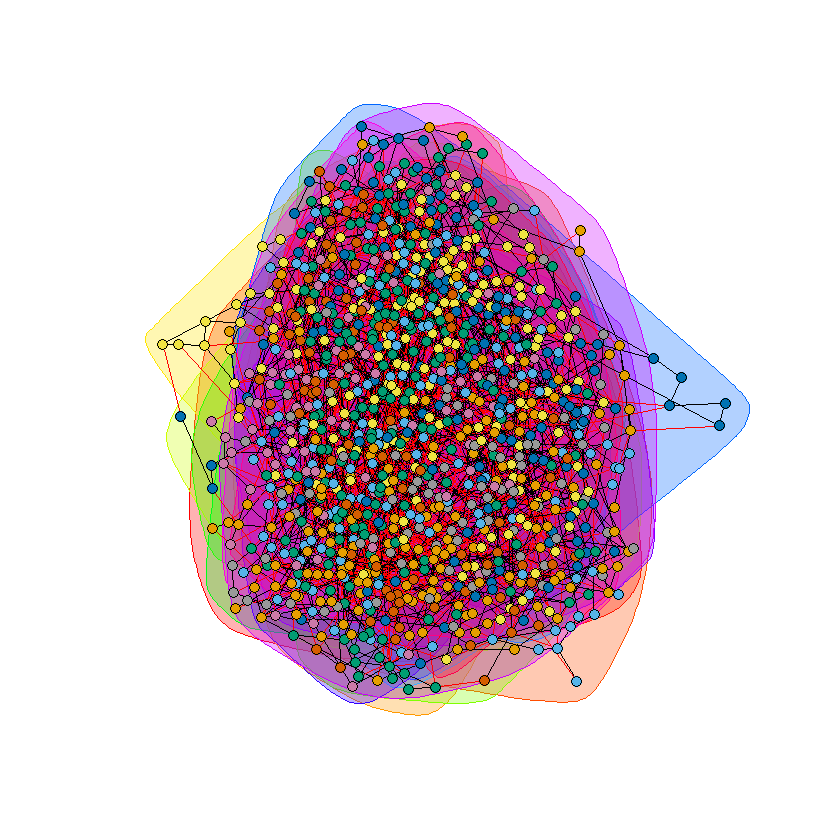

In [15]:
pa_part_f_1 = sample_pa(n = 1050,m = 2,directed = FALSE)
if(is_connected(pa_part_f_1)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_f_1,vertex.size=4, vertex.label=NA)
pa_community_1 = cluster_fast_greedy(pa_part_f_1)
pa_modularity_1 = modularity(pa_community_1)
plot(pa_community_1,pa_part_f_1, vertex.size = 4,vertex.label = NA)
print(paste("Modularity of PA graph: ", pa_modularity_1))

[1] "Partial Attachment Model produced a connected graph"


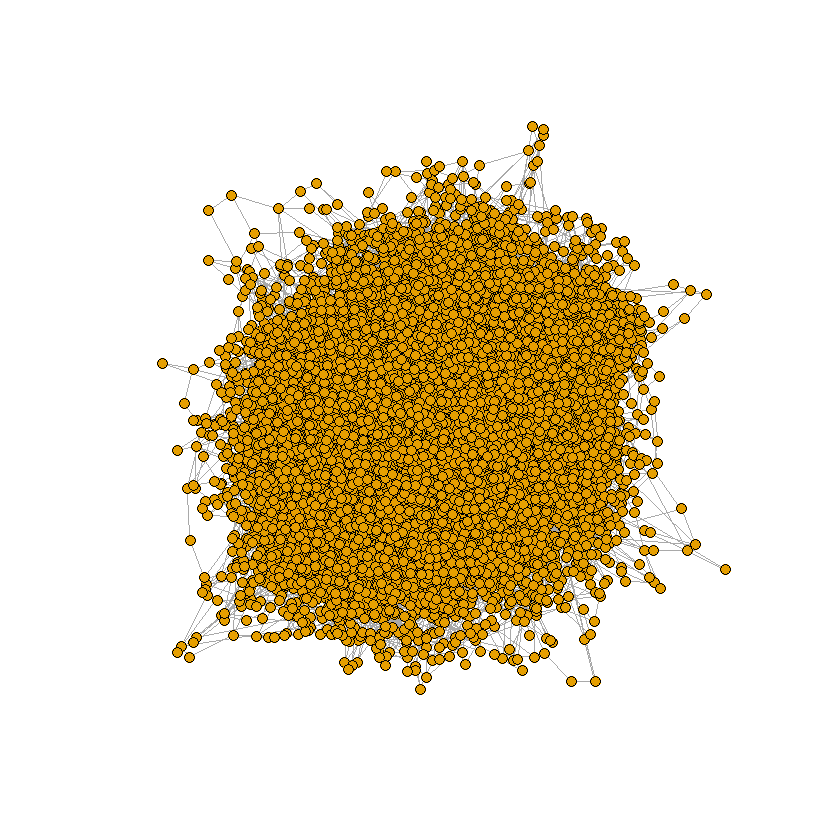

[1] "Modularity of PA graph:  0.53117781184504"


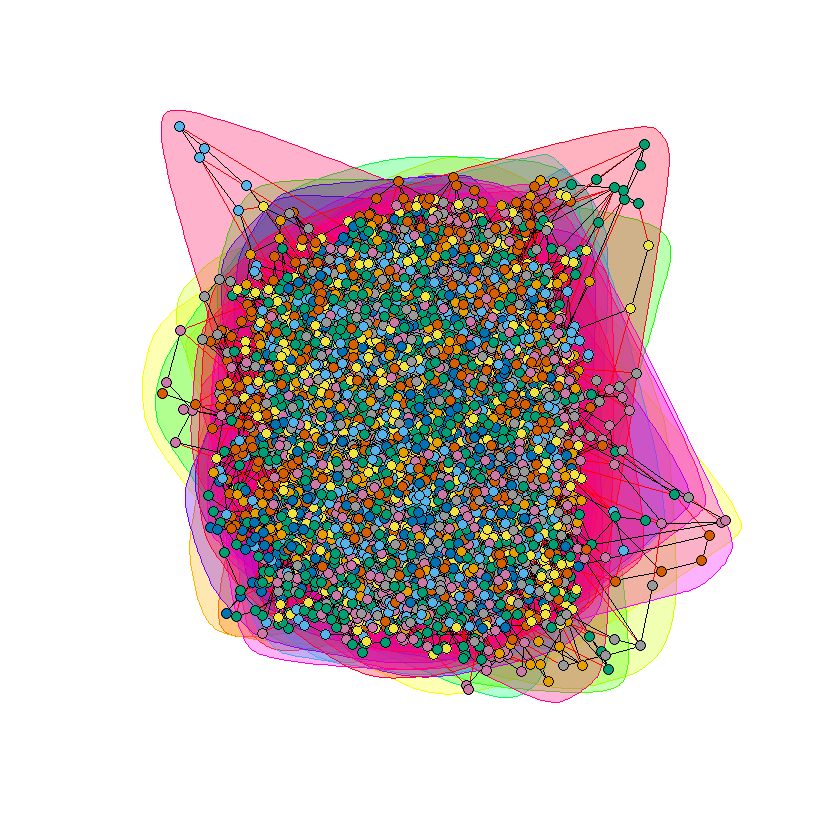

In [16]:
pa_part_f_2 = sample_pa(10050,m = 2,directed = FALSE)
if(is_connected(pa_part_f_2)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_f_2,vertex.size=4, vertex.label=NA)
pa_community_2 = cluster_fast_greedy(pa_part_f_2)
pa_modularity_2 = modularity(pa_community_2)
plot(pa_community_2,pa_part_f_2, vertex.size = 4,vertex.label = NA)
print(paste("Modularity of PA graph: ", pa_modularity_2))

[1] "Slope and intercept for n = 1050:"

Call:
lm(formula = log_dist_1 ~ log_deg_1)

Coefficients:
(Intercept)    log_deg_1  
      1.037       -2.311  



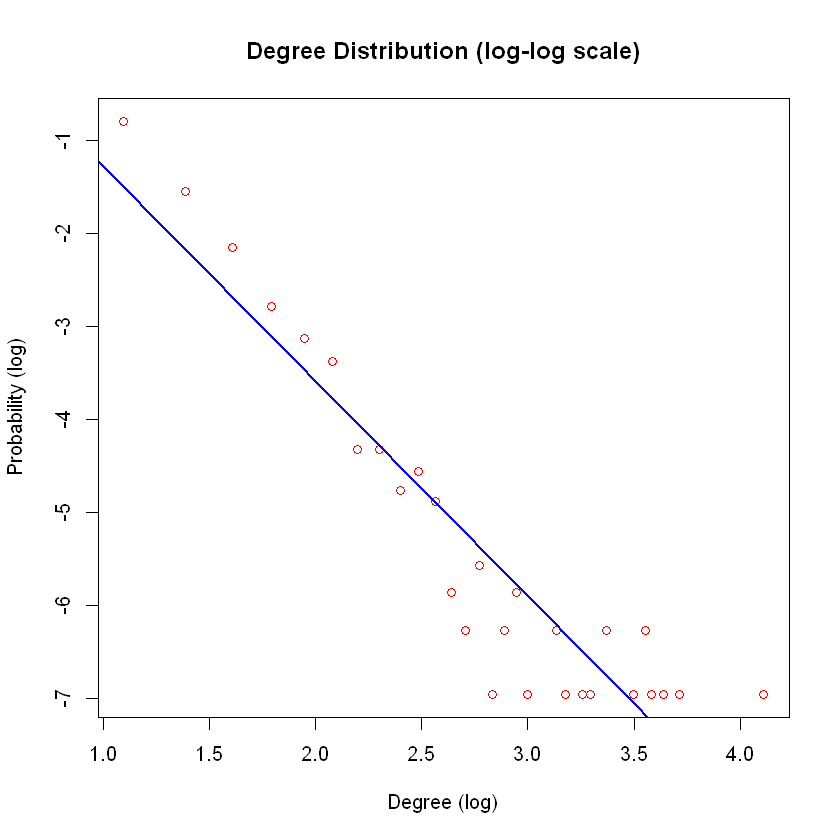

In [17]:
degree_dist_1 = degree.distribution(pa_part_f_1)
log_deg_1 <- log(which(degree_dist_1 !=0))
log_dist_1 <- log(degree_dist_1[which(degree_dist_1 !=0)])
plot(log_deg_1,log_dist_1,main="Degree Distribution (log-log scale)", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_1 = lm(log_dist_1 ~ log_deg_1)
abline(fit_1,col="blue",lwd=2)  
print("Slope and intercept for n = 1050:")
print(fit_1)

[1] "Fitting data for n = 10050:"

Call:
lm(formula = log_dist_2 ~ log_deg_2)

Coefficients:
(Intercept)    log_deg_2  
     0.8222      -2.4047  



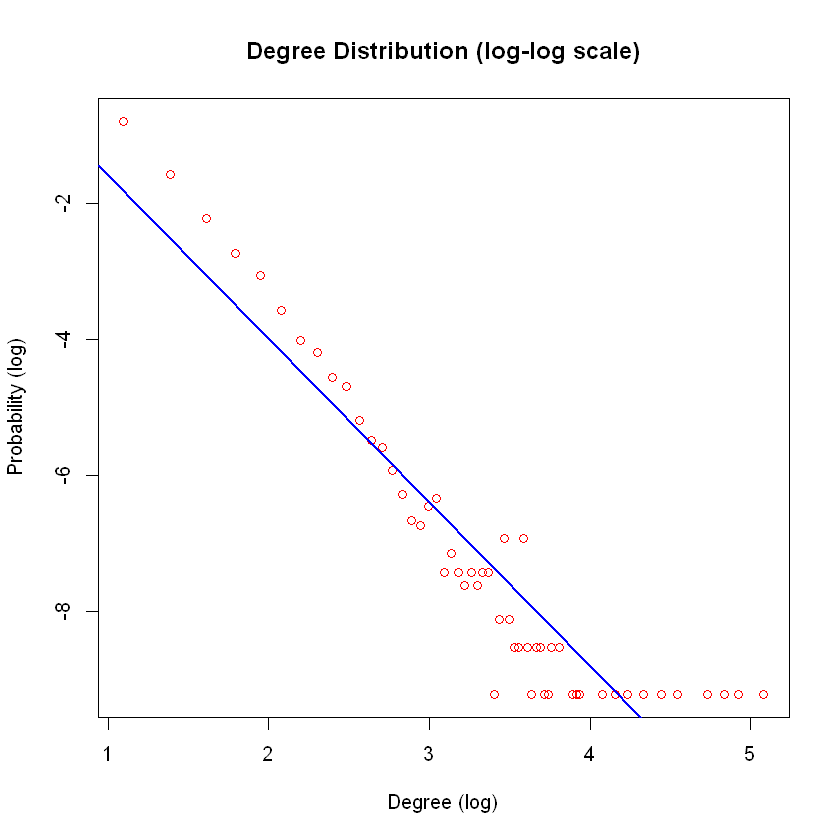

In [18]:
degree_dist_2 = degree.distribution(pa_part_f_2)
log_deg_2 <- log(which(degree_dist_2 !=0))
log_dist_2 <- log(degree_dist_2[which(degree_dist_2 !=0)])
plot(log_deg_2,log_dist_2,main="Degree Distribution (log-log scale)", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_2 = lm(log_dist_2 ~ log_deg_2)
abline(fit_2,col="blue",lwd=2)
print("Fitting data for n = 10050:")
print(fit_2)

In [19]:
degree_neighbors_a = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_f_1), 1) 
    neighbors_i = neighbors(pa_part_f_1, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_a = c(degree_neighbors_a, degree(pa_part_f_1, node_j))
}

In [20]:
degree_neighbors_c = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_f_2), 1) 
    neighbors_i = neighbors(pa_part_f_2, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_c = c(degree_neighbors_c, degree(pa_part_f_2, node_j))
}

[1] "Fitting data for n = 1050:"

Call:
lm(formula = log_dist_neighbors_a ~ log_degree_neighbors_a)

Coefficients:
           (Intercept)  log_degree_neighbors_a  
                -1.131                  -1.060  



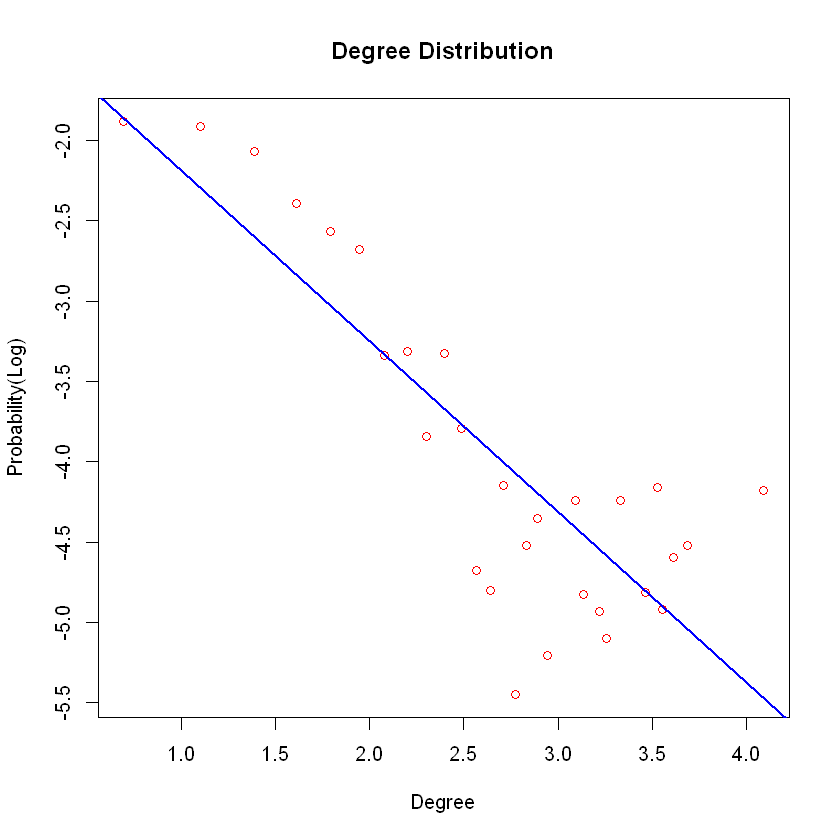

In [21]:
data_degree_neighbors_a = as.data.frame(table(degree_neighbors_a))
degrees = as.numeric(as.character(data_degree_neighbors_a$degree_neighbors_a))
log_degree_neighbors_a = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_a$Freq/sum(data_degree_neighbors_a$Freq)
log_dist_neighbors_a = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_a,log_dist_neighbors_a,main="Degree Distribution", xlab= "Degree",ylab= "Probability(Log)",col="red")
fit_3 = lm(log_dist_neighbors_a ~ log_degree_neighbors_a)
abline(fit_3,col="blue",lwd=2)
print("Fitting data for n = 1050:")
print(fit_3)

[1] "Fitting data for n = 10050:"

Call:
lm(formula = log_dist_neighbors_c ~ log_degree_neighbors_c)

Coefficients:
           (Intercept)  log_degree_neighbors_c  
                -1.006                  -1.290  



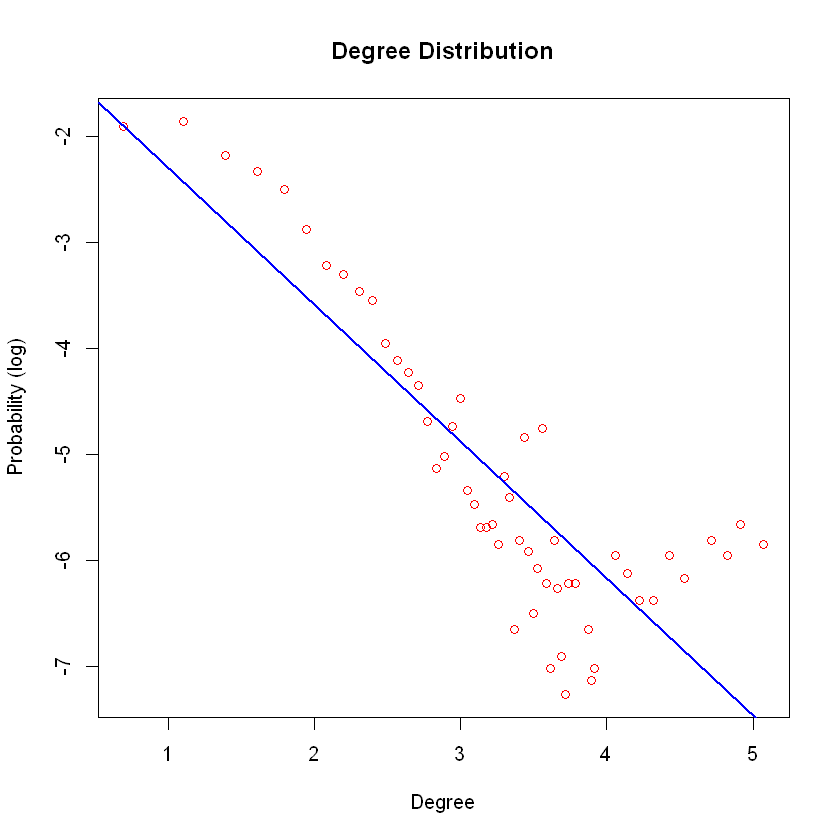

In [22]:
data_degree_neighbors_c = as.data.frame(table(degree_neighbors_c))
degrees = as.numeric(as.character(data_degree_neighbors_c$degree_neighbors_c))
log_degree_neighbors_c = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_c$Freq/sum(data_degree_neighbors_c$Freq)
log_dist_neighbors_c = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_c,log_dist_neighbors_c,main="Degree Distribution", xlab="Degree",ylab="Probability (log)",col="red")
fit_4 = lm(log_dist_neighbors_c ~ log_degree_neighbors_c)
abline(fit_4,col="blue",lwd=2)
print("Fitting data for n = 10050:")
print(fit_4)

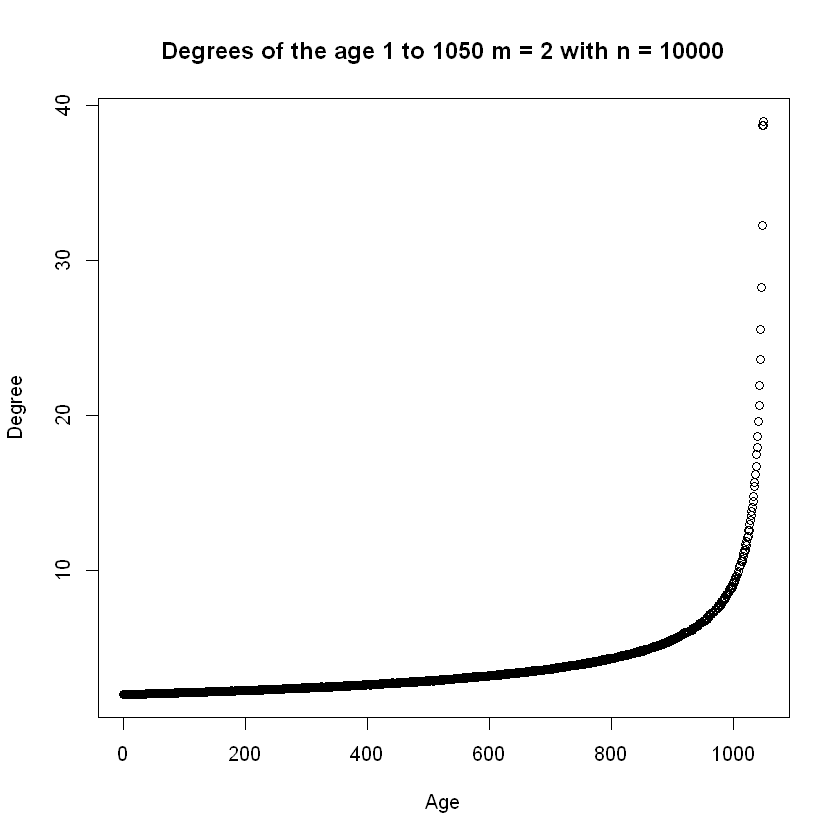

In [23]:
degree_age = rep(0,1050)
n_samples = 10000
for (i in seq(1:n_samples)) 
{
    graph_age = sample_pa(1050, m = 2, directed=FALSE)
    degree_age = degree_age + as.vector(degree(graph_age))
}

degree_age = degree_age / n_samples
plot(seq(1050,1,-1), degree_age, main="Degrees of the age 1 to 1050 m = 2 with n = 10000",xlab="Age",ylab="Degree")
     


[1] "Partial Attachment Model produced a connected graph"


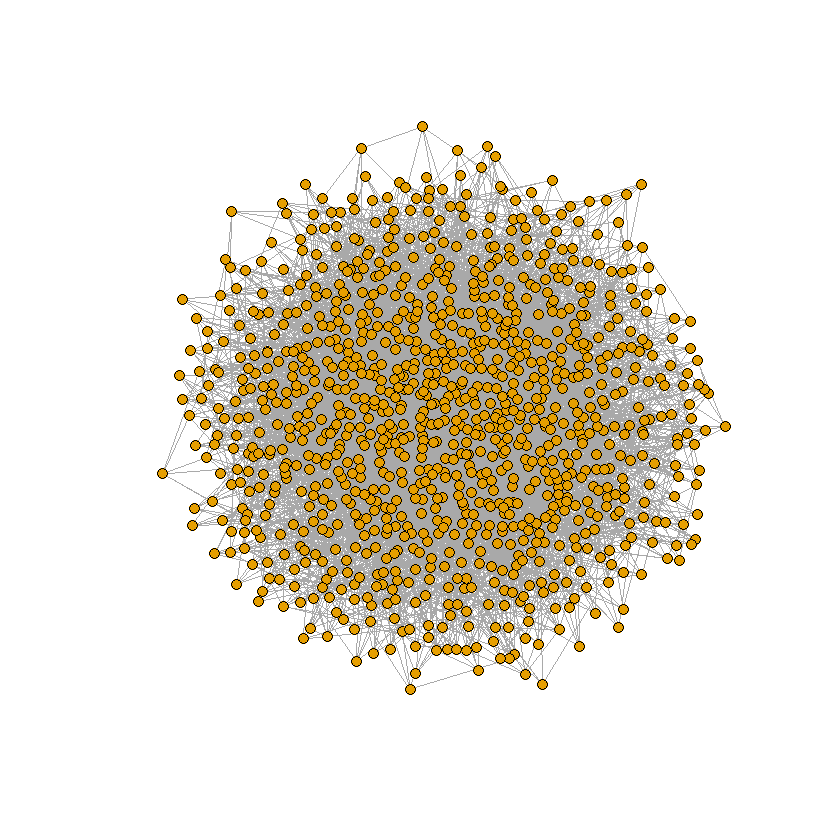

[1] "Modularity of PA graph:  0.275358385125464"


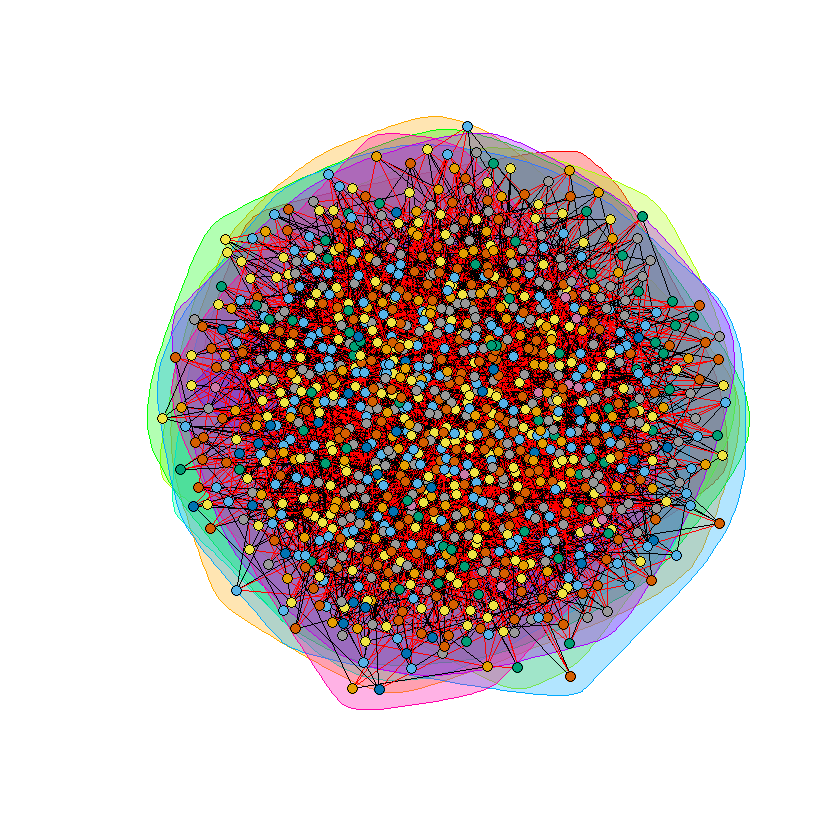

In [24]:
pa_part_f_3 = sample_pa(n=1050,m=5,directed = FALSE)
if(is_connected(pa_part_f_3)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_f_3,vertex.size=4, vertex.label=NA)
pa_community_3 = cluster_fast_greedy(pa_part_f_3)
pa_modularity_3 = modularity(pa_community_3)
plot(pa_community_3,pa_part_f_3, vertex.size = 4,vertex.label = NA)
print(paste("Modularity of PA graph: ", pa_modularity_3))

[1] "Partial Attachment Model produced a connected graph"


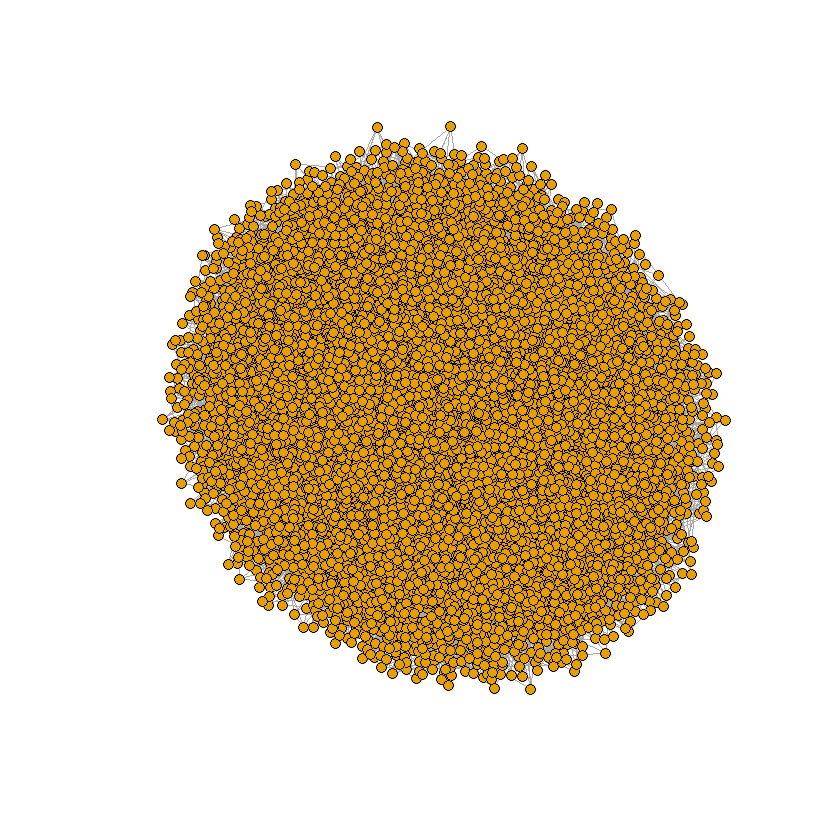

[1] "Modularity of PA graph:  0.275547979339348"


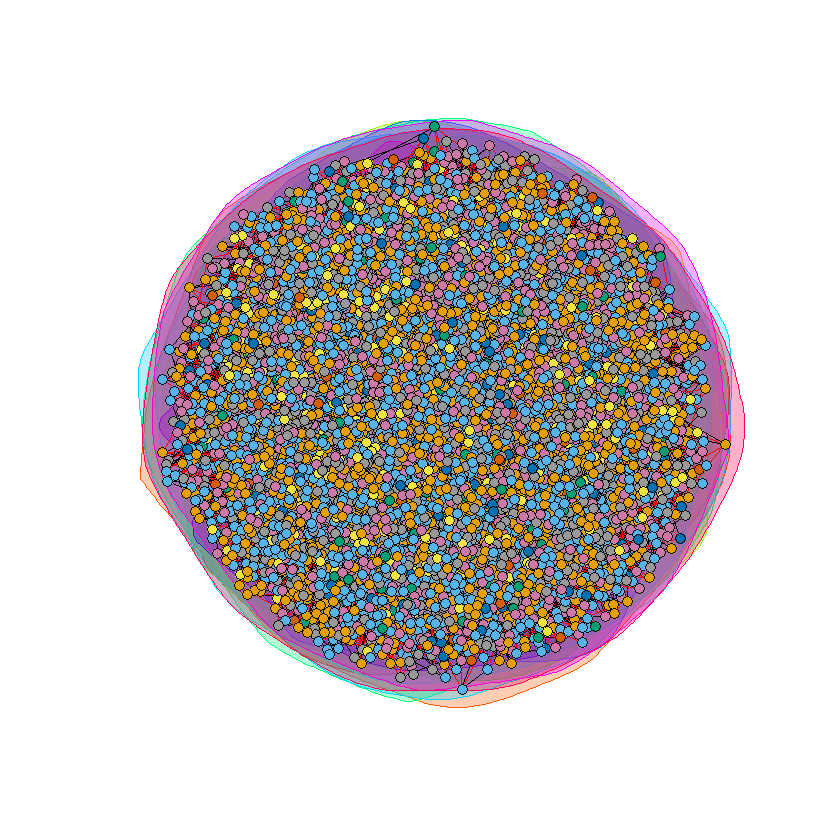

In [25]:
pa_part_f_4 = sample_pa(n=10050,m= 5,directed = FALSE)
if(is_connected(pa_part_f_4)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_f_4,vertex.size=4, vertex.label=NA)
pa_community_4 = cluster_fast_greedy(pa_part_f_4)
pa_modularity_4 = modularity(pa_community_4)
plot(pa_community_4,pa_part_f_4, vertex.size = 4,vertex.label = NA)
print(paste("Modularity of PA graph: ", pa_modularity_4))

[1] "Slope and intercept for n = 1050:"

Call:
lm(formula = log_dist_1 ~ log_deg_1)

Coefficients:
(Intercept)    log_deg_1  
      1.495       -2.053  



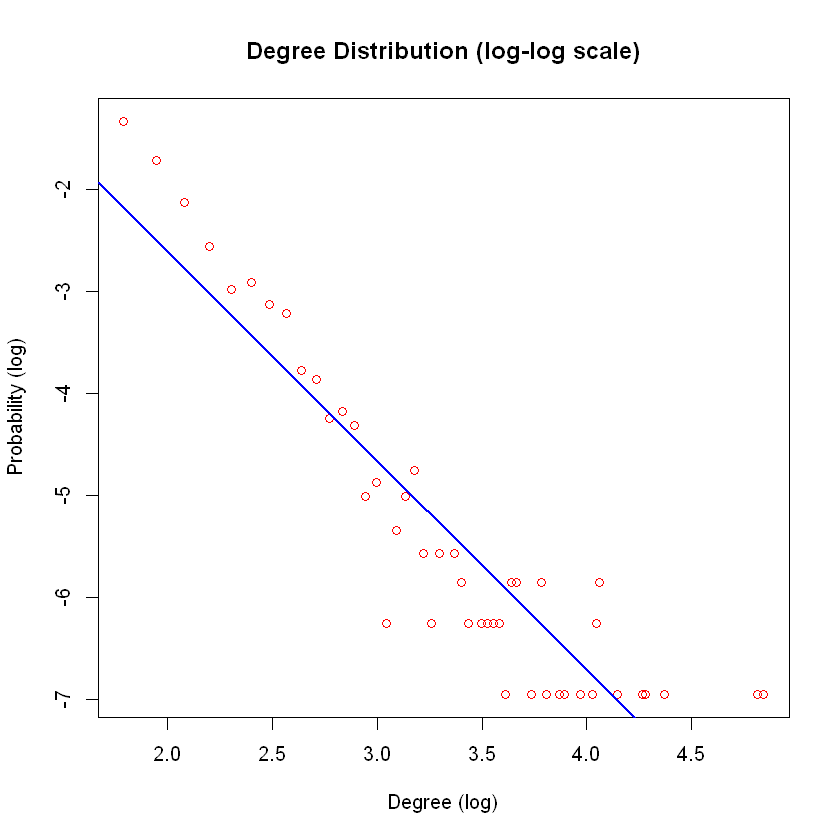

In [26]:
degree_dist_1 = degree.distribution(pa_part_f_3)
log_deg_1 <- log(which(degree_dist_1 !=0, arr.ind = TRUE))
log_dist_1 <- log(degree_dist_1[which(degree_dist_1 !=0)])
plot(log_deg_1,log_dist_1,main="Degree Distribution (log-log scale)", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_1 = lm(log_dist_1 ~ log_deg_1)
abline(fit_1,col="blue",lwd=2)  
print("Slope and intercept for n = 1050:")
print(fit_1)

[1] "Fitting data for n = 10050:"

Call:
lm(formula = log_dist_2 ~ log_deg_2)

Coefficients:
(Intercept)    log_deg_2  
      1.573       -2.236  



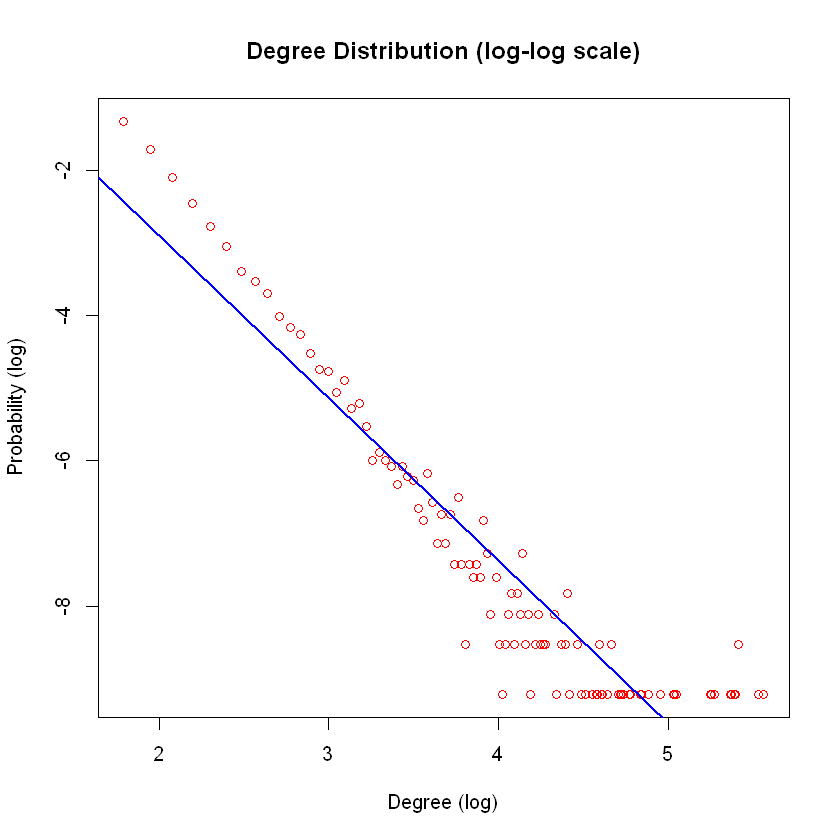

In [27]:
degree_dist_2 = degree.distribution(pa_part_f_4)
log_deg_2 <- log(which(degree_dist_2 !=0))
log_dist_2 <- log(degree_dist_2[which(degree_dist_2 !=0)])
plot(log_deg_2,log_dist_2,main="Degree Distribution (log-log scale)", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_2 = lm(log_dist_2 ~ log_deg_2)
abline(fit_2,col="blue",lwd=2)
print("Fitting data for n = 10050:")
print(fit_2)

In [28]:
degree_neighbors_a = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_f_3), 1) 
    neighbors_i = neighbors(pa_part_f_3, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_a = c(degree_neighbors_a, degree(pa_part_f_3, node_j))
}

In [29]:
degree_neighbors_c = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_f_4), 1) 
    neighbors_i = neighbors(pa_part_f_4, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_c = c(degree_neighbors_c, degree(pa_part_f_4, node_j))
}

[1] "Fitting data for n = 1050:"

Call:
lm(formula = log_dist_neighbors_a ~ log_degree_neighbors_a)

Coefficients:
           (Intercept)  log_degree_neighbors_a  
               -1.1605                 -0.9683  



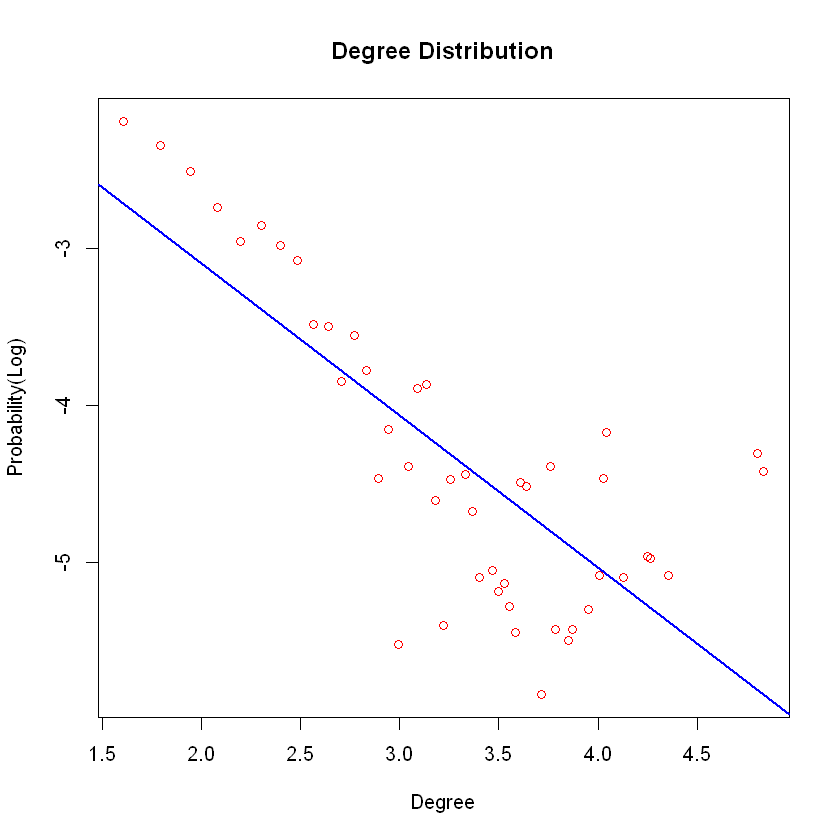

In [30]:
data_degree_neighbors_a = as.data.frame(table(degree_neighbors_a))
degrees = as.numeric(as.character(data_degree_neighbors_a$degree_neighbors_a))
log_degree_neighbors_a = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_a$Freq/sum(data_degree_neighbors_a$Freq)
log_dist_neighbors_a = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_a,log_dist_neighbors_a,main="Degree Distribution", xlab= "Degree",ylab= "Probability(Log)",col="red")
fit_3 = lm(log_dist_neighbors_a ~ log_degree_neighbors_a)
abline(fit_3,col="blue",lwd=2)
print("Fitting data for n = 1050:")
print(fit_3)

[1] "Fitting data for n = 10050:"

Call:
lm(formula = log_dist_neighbors_c ~ log_degree_neighbors_c)

Coefficients:
           (Intercept)  log_degree_neighbors_c  
               -0.9482                 -1.1923  



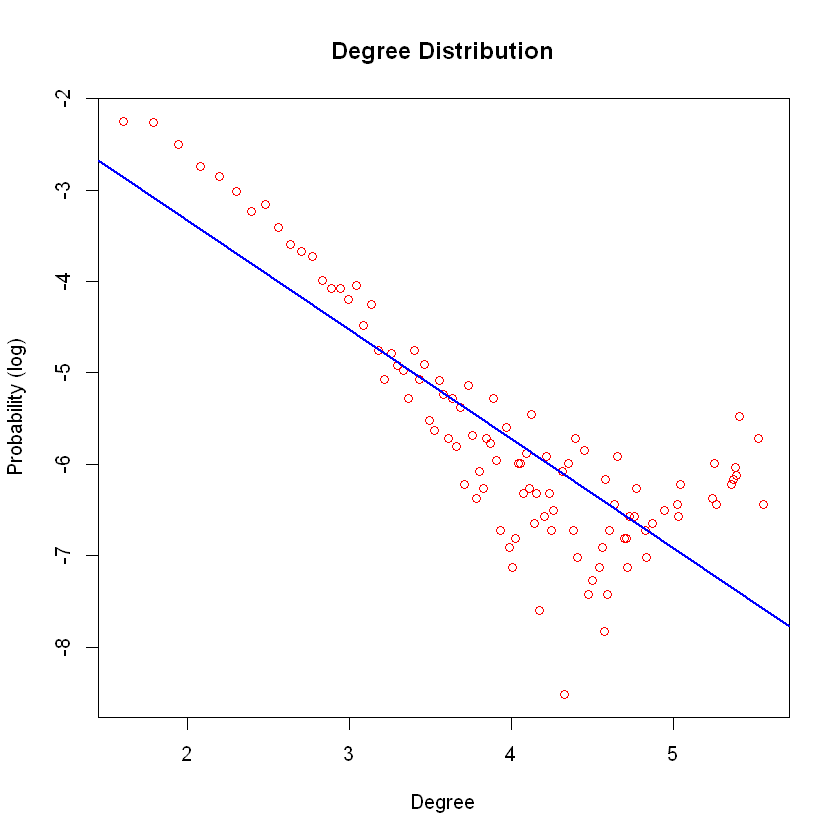

In [31]:
data_degree_neighbors_c = as.data.frame(table(degree_neighbors_c))
degrees = as.numeric(as.character(data_degree_neighbors_c$degree_neighbors_c))
log_degree_neighbors_c = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_c$Freq/sum(data_degree_neighbors_c$Freq)
log_dist_neighbors_c = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_c,log_dist_neighbors_c,main="Degree Distribution", xlab="Degree",ylab="Probability (log)",col="red")
fit_4 = lm(log_dist_neighbors_c ~ log_degree_neighbors_c)
abline(fit_4,col="blue",lwd=2)
print("Fitting data for n = 10050:")
print(fit_4)

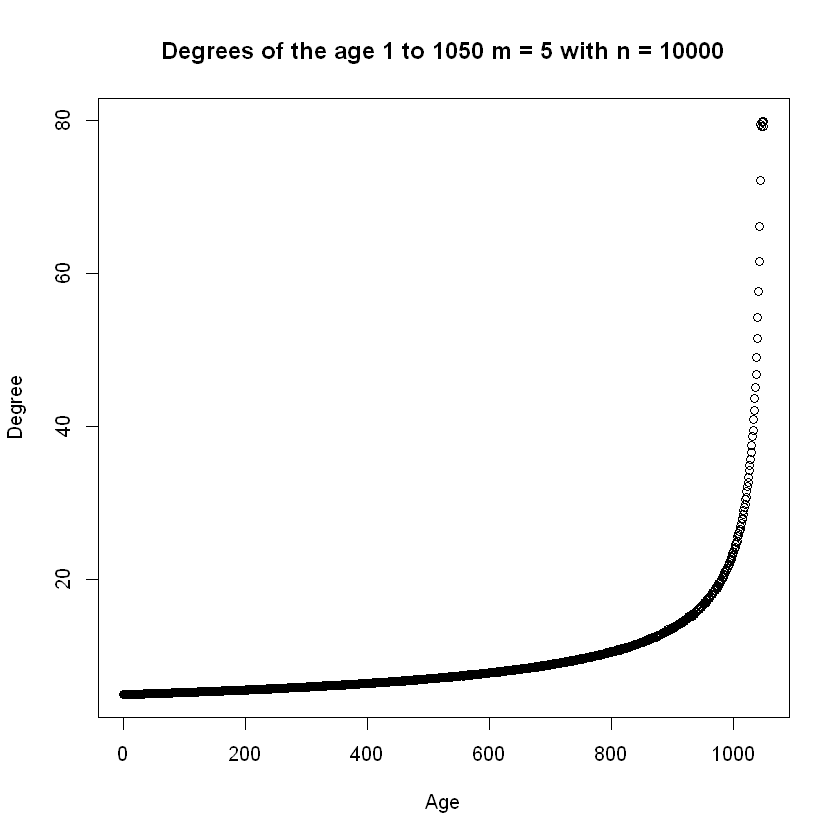

In [32]:
degree_age = rep(0,1050)
n_samples = 10000
for (i in seq(1:n_samples)) 
{
    graph_age = sample_pa(1050, m =5, directed=FALSE)
    degree_age = degree_age + as.vector(degree(graph_age))
}

degree_age = degree_age / n_samples
plot(seq(1050,1,-1), degree_age, main="Degrees of the age 1 to 1050 m = 5 with n = 10000",xlab="Age",ylab="Degree")
     


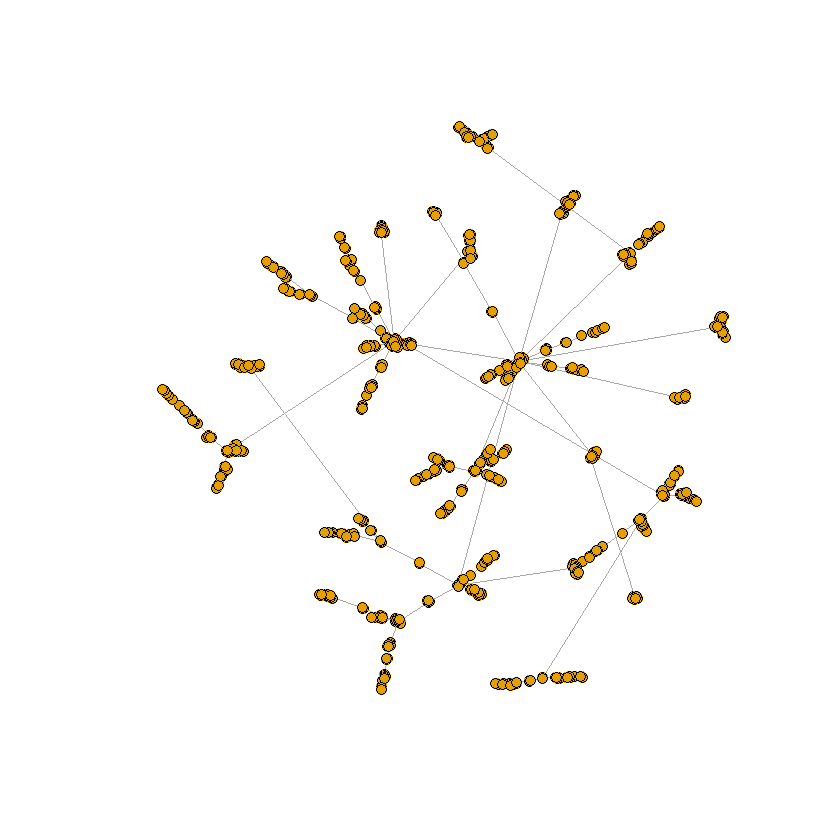

[1] "Partial Attachment Model produced a connected graph"
[1] "Modularity of PA graph:  0.934675631883286"


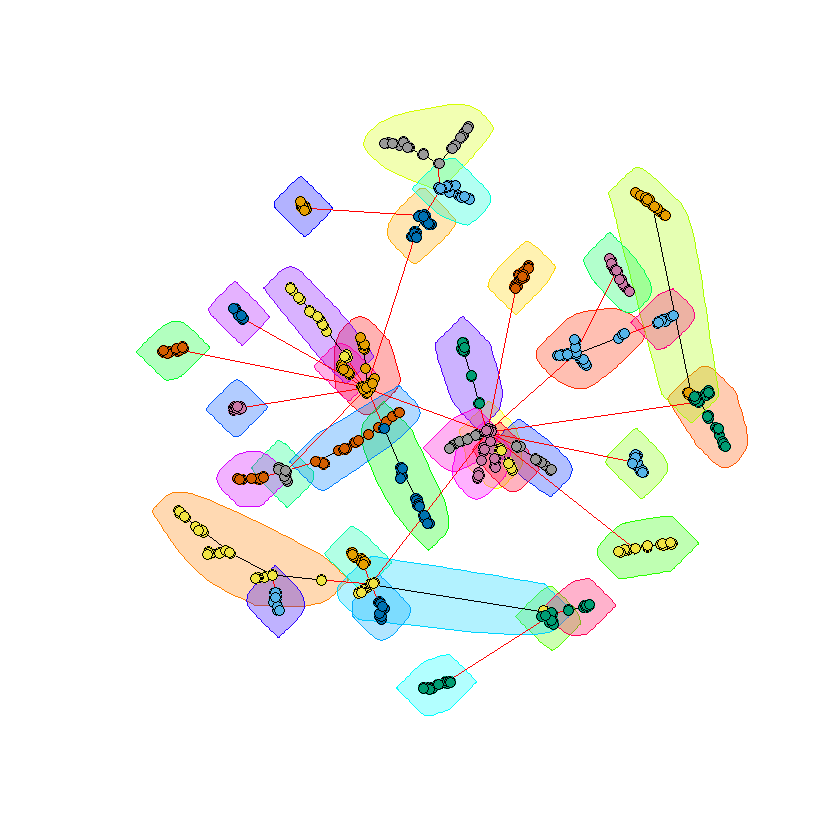

In [36]:
#part h
graph_h = sample_pa(1050, m = 1 , directed=FALSE)
community_h = fastgreedy.community(graph_h)
modularity_h = modularity(community_h)
plot(graph_h,vertex.size=4, vertex.label=NA)
plot(community_h,graph_h,vertex.size=4, vertex.label=NA)

if(is_connected(graph_h)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")  
}
print(paste("Modularity of PA graph: ", modularity_h))



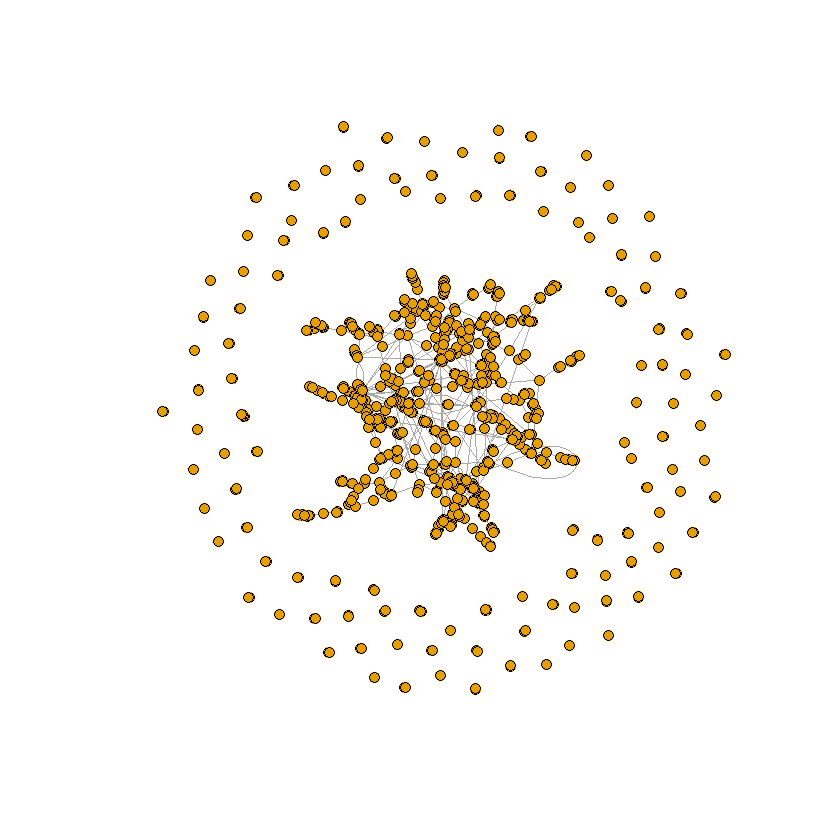

[1] "Partial Attachment Model did not produce a connected graph"
[1] "Modularity of PA graph:  0.73173463344574"


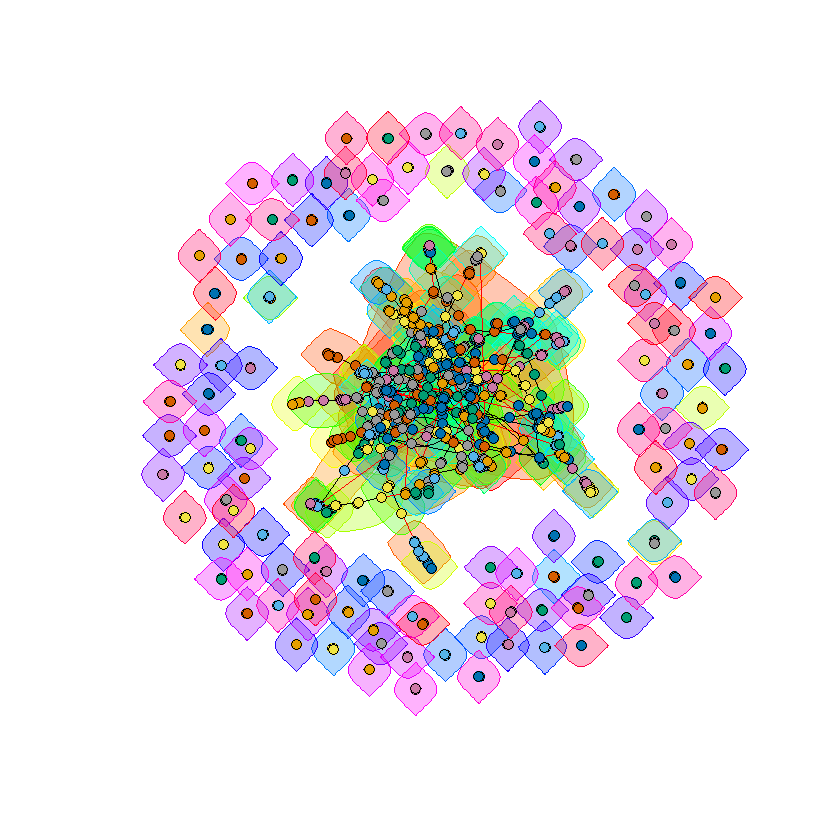

In [37]:
degrees_h = degree(graph_h) 
graph_h_2 = sample_degseq(degrees_h, method="simple")
community_h_2 = walktrap.community(graph_h_2)
modularity_h_2 = modularity(community_h_2)
plot(graph_h_2,vertex.size=4, vertex.label=NA)
plot(community_h_2,graph_h_2,vertex.size=4, vertex.label=NA)

if(is_connected(graph_h_2)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")  
}
print(paste("Modularity of PA graph: ", modularity_h_2))
